# Resumo

### Cápitulo 1: Importando Dados e Primeiras Visualizações
- 1.1: Importando Dados
- 1.2: Tipos de Dados

### Cápitulo 2: Processamento de Dados
- 2.1: Limpar Comentários
- 2.2: Traduzir Comentários
- 2.3: Tratamento Finais

### Cápitulo 3: Análise de Sentimentos
- 3.1: Vader
- 3.2: Análise de Resultados

### Cápitulo 4: Análise Visual
- 4.1: Distribuição de Sentimentos
- 4.2: Análise Temporal de Comentários

# Cápitulo 1: Importando Dados e Primeiras Visualizações

### 1.1: Importando Dados

In [1]:
import pandas as pd

# Eliminate the warnings. 
import warnings
warnings.filterwarnings("ignore")

df_raw = pd.read_csv("npl_planetadosmacacos_raw.csv")

In [2]:
df_raw

,Unnamed: 0,Comentario,Nome
0,0,"VerifiedJul 3, 2024I really like the direction...",B
1,1,"VerifiedJul 3, 2024I liked the eagles. I had...",alexander p
2,2,"VerifiedJul 2, 2024weak plot and charactersSho...",609
3,3,"VerifiedJul 2, 2024The movie was average. I th...",P-Lawrence
4,4,"VerifiedJul 2, 2024The story base was very goo...",Joan
...,...,...,...
115545,115545,"May 8, 2024The world design is very intresting...",Nikita S
115546,115546,"May 8, 2024I was turned on the whole time, the...",Andy C
115547,115547,"May 8, 2024I absolutely adored it! The visuals...",Petar M
115548,115548,"May 8, 2024Better than the previous two!Show L...",Thomas S


### 1.2: Tipos de Dados

In [3]:
df_raw.dtypes

Unnamed: 0     int64
Comentario    object
Nome          object
dtype: object

# Cápitulo 2: Processamento de Dados

In [4]:
df_clean = df_raw.copy()

# Remover duplicatas mantendo apenas uma ocorrência
df_clean = df_raw.drop_duplicates(subset='Comentario')

# Mostrar DataFrame sem duplicatas
print("DataFrame sem duplicatas:")
df_clean

DataFrame sem duplicatas:


,Unnamed: 0,Comentario,Nome
0,0,"VerifiedJul 3, 2024I really like the direction...",B
1,1,"VerifiedJul 3, 2024I liked the eagles. I had...",alexander p
2,2,"VerifiedJul 2, 2024weak plot and charactersSho...",609
3,3,"VerifiedJul 2, 2024The movie was average. I th...",P-Lawrence
4,4,"VerifiedJul 2, 2024The story base was very goo...",Joan
...,...,...,...
115545,115545,"May 8, 2024The world design is very intresting...",Nikita S
115546,115546,"May 8, 2024I was turned on the whole time, the...",Andy C
115547,115547,"May 8, 2024I absolutely adored it! The visuals...",Petar M
115548,115548,"May 8, 2024Better than the previous two!Show L...",Thomas S


### 2.1: Limpar Comentários

In [5]:
import re

def limpar_comentario(comentario):
    # Regex para encontrar e capturar a data no início (assumindo o formato: "VerifiedJun 21, 2024" ou "Jun 21, 2024")
    data = re.search(r'^(Verified)?(\w+ \d{1,2}, \d{4})', comentario)
    
    # Se a data for encontrada, capturá-la e removê-la do comentário
    if data:
        data = data.group(2)  # Pegar apenas a parte da data, ignorando "Verified"
        # Converter a data para o formato datetime
        data = pd.to_datetime(data, format='%b %d, %Y')
        comentario = re.sub(r'^(Verified)?\w+ \d{1,2}, \d{4}', '', comentario)
    else:
        data = None
    
    # Remover "Show LessShow MoreFlag this review" no final, se presente
    comentario = re.sub(r'Show LessShow MoreFlag this review$', '', comentario)
    
    # Strip para remover espaços extras no início e no fim do comentário limpo
    comentario = comentario.strip()
    
    return data, comentario

In [6]:
# Aplicar a função à coluna 'Comentário' e criar novas colunas para data e comentário limpo
df_clean[['Data', 'Comentario']] = df_clean['Comentario'].apply(limpar_comentario).apply(pd.Series)
df_clean['Comentario_Limpo'] = df_clean['Comentario']

In [7]:
df_clean.head()

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo
0,0,I really like the direction this new chapter i...,B,2024-07-03,I really like the direction this new chapter i...
1,1,I liked the eagles. I had problems with the ...,alexander p,2024-07-03,I liked the eagles. I had problems with the ...
2,2,weak plot and characters,609,2024-07-02,weak plot and characters
3,3,The movie was average. I thought that the plot...,P-Lawrence,2024-07-02,The movie was average. I thought that the plot...
4,4,The story base was very good very different fr...,Joan,2024-07-02,The story base was very good very different fr...


In [8]:
df_clean.dtypes

Unnamed: 0                   int64
Comentario                  object
Nome                        object
Data                datetime64[ns]
Comentario_Limpo            object
dtype: object

### 2.2: Traduzir Comentários

In [9]:
from googletrans import Translator
from langdetect import detect

# Instantiate translator
translator = Translator()

# List to store original and translated comments
translated_comments = []

# Function to detect language and translate to English
def traduzir_para_ingles(comentario, index):
    try:
        if detect(comentario) != 'en':
            translated_text = translator.translate(comentario, src=detect(comentario), dest='en').text
            translated_comments.append({'Index': index, 'Original': comentario, 'Translated': translated_text})
            return translated_text
        return comentario
    except:
        return comentario

In [10]:
# Apply the translation function to the 'Comentário' column safely using .loc
df_clean.loc[:, 'Comentario_Limpo'] = df_clean.apply(lambda row: traduzir_para_ingles(row['Comentario_Limpo'], row.name), axis=1)

# Create a DataFrame with the original and translated comments
df_translated = pd.DataFrame(translated_comments)

df_translated.head(10)

,Index,Original,Translated
0,112,(ESPAÑOL) Una película muy entretenida que exp...,(Spanish) A very entertaining film that expand...
1,290,Muy buena película con un gran protagonista qu...,Very good film with a great protagonist who st...
2,551,"Filme muito bom,só acho que deveria ter um pou...","Very good movie, I just think I should have a ..."
3,890,"Entretenida, creativa, emocionante","Entertainment, creative, exciting"
4,896,"Excelente continuación, hay detalles que parec...","Excellent continuation, there are details that..."
5,1080,I smelt ape doo doo LOL,I Melt Ape Doo Doo Lol
6,1540,APES TOGETHER!!! STRONG!!!,Apes Together !!!Strong !!!
7,1542,Great sign language,Great sign language
8,1552,Saw in 4D. did not disappoint.,SAW in 4D.Did Not Disappoint.
9,1815,No es una mala película pero claramente es muy...,It is not a bad movie but it is clearly much l...


### 2.3: Tratamentos Finais

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from autocorrect import Speller

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
spell = Speller(lang='en')

# Define text preprocessing function
def preprocess_and_correct_text(text):
    # Remove variações de "Bad Boys" e "bad boy"
    text = re.sub(r'\bbad boys?\b', '', text, flags=re.IGNORECASE).strip()
    # Remove pontuação e números
    text = re.sub(r'[\d{}]+'.format(re.escape(string.punctuation)), '', text)
    # Tokenização
    words = word_tokenize(text)
    # Remover stop words, lematizar e corrigir ortografia
    processed_words = [spell(lemmatizer.lemmatize(word.lower())) for word in words if word.lower() not in stop_words]
    # Juntar as palavras em uma string única e normalizar espaços em branco
    cleaned_text = ' '.join(processed_words).strip()
    return cleaned_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df_clean['Comentario_Limpo'] = df_clean['Comentario_Limpo'].apply(preprocess_and_correct_text)
df_clean

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo
0,0,I really like the direction this new chapter i...,B,2024-07-03,really like direction new chapter heading enou...
1,1,I liked the eagles. I had problems with the ...,alexander p,2024-07-03,liked eagle problem plot didnt really hang tog...
2,2,weak plot and characters,609,2024-07-02,weak plot character
3,3,The movie was average. I thought that the plot...,P-Lawrence,2024-07-02,movie average thought plot entirely hold toget...
4,4,The story base was very good very different fr...,Joan,2024-07-02,story base good different previous one beginni...
...,...,...,...,...,...
115545,115545,The world design is very intresting and well d...,Nikita S,2024-05-08,world design interesting well done hoping see ...
115546,115546,"I was turned on the whole time, the director w...",Andy C,2024-05-08,turned whole time director went freak one🤤🤤
115547,115547,"I absolutely adored it! The visuals, sound eff...",Petar M,2024-05-08,absolutely adorned visuals sound effect motion...
115548,115548,Better than the previous two!,Thomas S,2024-05-08,better previous two


# Cápitulo 3: Análise de Sentimentos

### 3.1: Vader

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positivo'
    elif score['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

In [14]:
# Aplicar a função à coluna 'Comentário' e armazenar o resultado em uma nova coluna 'Sentimento'
df_clean['Sentimento'] = df_clean['Comentario_Limpo'].apply(analyze_sentiment_vader)

### 3.2: Análise de Resultados

In [15]:
# Filtrar linhas onde 'Sentimento' é 'positivo'
comentarios_negativos = df_clean[df_clean['Sentimento'] == 'positivo']

comentarios_negativos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
0,0,I really like the direction this new chapter i...,B,2024-07-03,really like direction new chapter heading enou...,positivo
4,4,The story base was very good very different fr...,Joan,2024-07-02,story base good different previous one beginni...,positivo
5,5,Great story going back to the original movie s...,Todd,2024-07-02,great story going back original movie storyline,positivo
6,6,Ive always loved watching planet of the apes s...,Judith,2024-07-01,ive always loved watching planet ape bought gr...,positivo
7,7,Good movie but not enough action,NaN,2024-07-01,good movie enough action,positivo
8,8,The is film is probably one of the strongest i...,Harry S,2024-07-01,film probably one strongest series major plot ...,positivo
9,9,Really enjoyed. These are always good in my bo...,Dyan L,2024-07-01,really enjoyed always good book miss cesar,positivo
10,10,Very good. Best of the franchise.,Tom C,2024-07-01,good best franchise,positivo
11,11,It was good. Just way too long.,Susan D,2024-06-30,good way long,positivo
12,12,Amazing! Definitely worth watching,Coralis M,2024-06-30,amazing definitely worth watching,positivo


In [16]:
# Filtrar linhas onde 'Sentimento' é 'negativo'
comentarios_negativos = df_clean[df_clean['Sentimento'] == 'negativo']

comentarios_negativos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
2,2,weak plot and characters,609,2024-07-02,weak plot character,negativo
3,3,The movie was average. I thought that the plot...,P-Lawrence,2024-07-02,movie average thought plot entirely hold toget...,negativo
41,41,"This movie was bad, so boring. I feel like I w...",Hannah R,2024-06-29,movie bad boring feel like wasted money seeing...,negativo
43,43,It was overall boring and didn’t really make s...,NaN,2024-06-29,overall boring ’ really make sense put together,negativo
48,48,Waste of my money the movie had nothing to do ...,Edye,2024-06-27,waste money movie nothing previous movie made ...,negativo
49,49,Kingdom was least an hour too long and a prett...,Dirk W,2024-06-27,kingdom least hour long pretty dumb movie nowh...,negativo
58,58,"Very solid, feels a little different due to Ca...",Noah,2024-06-26,solid feel little different due cesar dead arc...,negativo
108,108,"A very slow start, that I thank the movie coul...",Austin W,2024-06-25,slow start thank movie could seeded movie pick...,negativo
112,112,(ESPAÑOL) Una película muy entretenida que exp...,Seba P,2024-06-24,spanish entertaining film expands lore saga ma...,negativo
117,117,Weak story line. Dialogue was so-so. Should ha...,L.M.,2024-06-24,weak story line dialogue solo background cesar...,negativo


In [17]:
# Filtrar linhas onde 'Sentimento' é 'neutro'
comentarios_negativos = df_clean[df_clean['Sentimento'] == 'neutro']

comentarios_negativos.head(10)

,Unnamed: 0,Comentario,Nome,Data,Comentario_Limpo,Sentimento
1,1,I liked the eagles. I had problems with the ...,alexander p,2024-07-03,liked eagle problem plot didnt really hang tog...,neutro
110,110,Literally 3 hours of my life I cant get back!,Kara,2024-06-24,literally hour life cant get back,neutro
182,182,"This movie was horrible. In my opinion, consid...",NaN,2024-06-23,movie horrible opinion considered leaving mult...,neutro
189,189,This movie had sooo much potential. But…. They...,NaN,2024-06-23,movie soon much potential but… dropped ball sl...,neutro
194,194,sa I usually don't do this but I saw it twic...,xtopheles,2024-06-22,sa usually dont saw twice thats say,neutro
195,195,It was not what I expected!! The fourth movie ...,Tamai,2024-06-22,expected fourth movie tied first three sequel ...,neutro
296,296,Really impressed with the world-building and t...,Indigo O,2024-06-19,really impressed worldbuilding visuals movie w...,neutro
298,298,Was OK - nothing special,John K,2024-06-19,ok nothing special,neutro
544,544,Had high expectations,Lisa C,2024-06-17,high expectation,neutro
882,882,Its exactly if Disney tried to make a planet o...,Joseph,2024-06-15,exactly disney tried make planet ape movie don...,neutro


In [18]:
df_clean.to_csv("npl_planetadosmacacos_clean.csv")

# Cápitulo 4: Análise Visual

### 4.1: Distribuição de Sentimentos

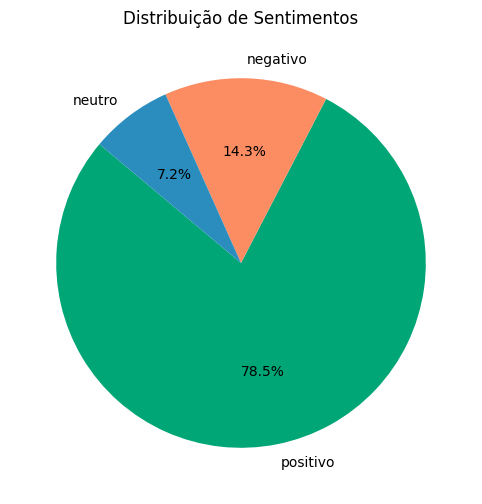

In [19]:
import matplotlib.pyplot as plt

# Conta a quantidade de cada valor na coluna 'Sentimento'
contagem_sentimentos = df_clean['Sentimento'].value_counts()

# Prepara os dados para o gráfico de pizza
labels = contagem_sentimentos.index
sizes = contagem_sentimentos.values

# Cores correspondentes aos sentimentos
cores = {
    'positivo': '#00a676',  # Verde mais escuro
    'neutro': '#2b8cbe',    # Azul mais escuro
    'negativo': '#fc8d62'   # Vermelho mais escuro
}

# Cria o gráfico de pizza
plt.figure(figsize=(8, 6))  # Tamanho da figura (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=[cores[label] for label in labels])

# Adiciona título
plt.title('Distribuição de Sentimentos')

# Mostra o gráfico
plt.show()

### 4.2: Análise Temporal de Comentários

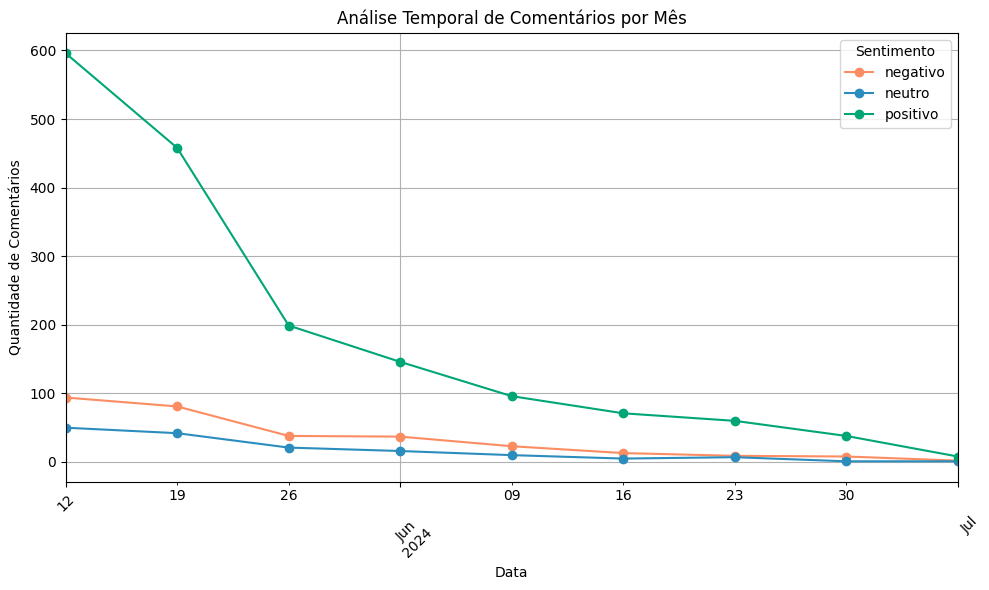

In [25]:
# Agrupar por bimestre e sentimento
comentarios_por_mes = df_clean.groupby([pd.Grouper(key='Data', freq='W'), 'Sentimento']).size().unstack(fill_value=0)

# Plotar o gráfico de linha com cores personalizadas
ax = comentarios_por_mes.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6), color=[cores.get(x, '#333333') for x in comentarios_por_mes.columns])
plt.xlabel('Data')
plt.ylabel('Quantidade de Comentários')
plt.title('Análise Temporal de Comentários por Semana')
plt.legend(title='Sentimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()